# Production Scenario of Electric Vehicles
---

**Project Title:** Investigating the production scenario of the electric cars.

---

#### Data Source: ***[catalog.data.gov/dataset/electric-vehicle-population-data](https://catalog.data.gov/dataset/electric-vehicle-population-data)***

## Project Description:

This project deals with the emerging production scenario of the electric vehicles and the measures of the popularity of these cars.The dataset was collected from [data.gov](https://data.gov/). 

#### Project Goals:
The main focus of this project is to find out the number of cars manufactured and the fluctuations in productions of the electric vehicle producing companies.

#### Project Guidelines:
- Finding out the number of cars produced by each company.
- Identifying the top 10 manufacturing companies.
- Inspecting the electric range of the top 10 companies.
- Visualizing the production scenario of last 25 years of the top 10 companies.

## Project Solution:
We will start by calling python libraries and modules.

**Calling the python libraries:**

In [1]:
# Importing python libraries
#!pip install mplcursors
import numpy as np
import pandas as pd
import mplcursors
import matplotlib.pyplot as plt

**Creating pandas DataFrame from csv file:**

In [2]:
# Reading csv file and Creating dataframe

raw_data = pd.read_csv("C:/Users/mahbu/Downloads/Electric_Vehicle_Population_Data.csv")
data = pd.DataFrame(raw_data)

**Showing the first and last 5 rows of the DataFrame:**

In [3]:
# Showing the first 5 rows of the DataFrame

pd.set_option('display.max_colwidth', 80)
data.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
# Showing the last 5 rows of the DataFrame

data.tail(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY,5.305307e+10
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY,5.305306e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
130441,5YJXCBE22L,Island,Camano Island,WA,98282.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10.0,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY,5.302997e+10
130442,5YJ3E1EA5M,Pierce,Puyallup,WA,98375.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,2.0,180473639,POINT (-122.30116 47.1165),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY,5.305307e+10


### Evaluation of the Production Scenario

In [5]:
# Checking the production case based on make over the years

Make_raw_data = data.groupby(by=['Make'])[['Model']].count()
Make_raw_data

,Model
Make,
AUDI,2622
AZURE DYNAMICS,7
BENTLEY,3
BMW,5696
CADILLAC,103
CHEVROLET,11251
CHRYSLER,2139
FIAT,803
FISKER,14


We will take the top 10 production companies for analysis.

In [6]:
# Taking the 10 largest production companies for analysis

Make_largest_data = Make_raw_data.nlargest(n=10,columns=['Model'])
Make_largest_data

,Model
Make,
TESLA,59629
NISSAN,13023
CHEVROLET,11251
FORD,6743
BMW,5696
KIA,5252
TOYOTA,4770
VOLKSWAGEN,3432
VOLVO,2891


In [7]:
Largest_production_companies_list = list(Make_largest_data.index.values)
print("Larger Production Companies: {}\n".format(Largest_production_companies_list))

Make_data = data[data['Make'].isin(Make_largest_data.index.values)]

Each_company_production_details = {}
for company in Largest_production_companies_list:
    Each_company_production_details[company] = Make_data[Make_data['Make']==company][['Make','Model Year','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Range']]


Larger Production Companies: ['TESLA', 'NISSAN', 'CHEVROLET', 'FORD', 'BMW', 'KIA', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'AUDI']



### Visualizing the Electric Range of Top 10 Companies

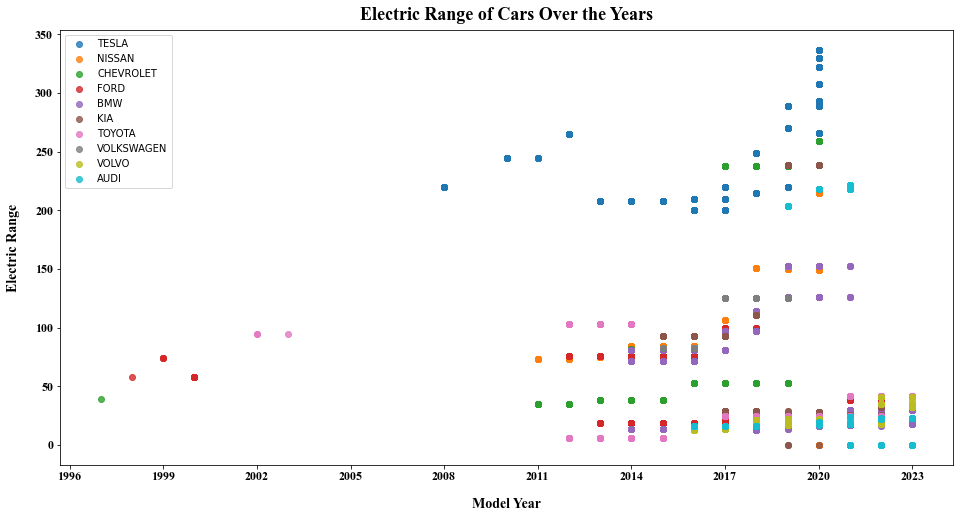

In [8]:
# Visualization

# Specifying the fonts and fontproperties for title,labels and ticks
font = {'family': ['Times New Roman','sherif'],'color':  'black','weight': 'bold','size': 14,}
font_tick = {"family":"Times New Roman","size":12,"weight":"heavy","style":"normal"}

# Plotting the result_data
plt.figure(figsize=(16,8))

scatter_plot = []
for company in Largest_production_companies_list:
    electric_range_dataframe = data[data['Make']==company]
    scatter_plot.append(plt.scatter(electric_range_dataframe.loc[:,'Model Year'],
                                    electric_range_dataframe.loc[:,'Electric Range'],alpha=0.8))

# Manipulating the title, labels and legend
plt.title("Electric Range of Cars Over the Years",fontdict=font,size=18,fontweight='bold',pad=10)
plt.xlabel('Model Year',fontdict=font,labelpad=15)
plt.ylabel('Electric Range',fontdict=font,labelpad=15)
plt.legend(Largest_production_companies_list,prop={'weight':"normal"})


# Rearranging and specifying the ticks
plt.xticks(np.arange(1996,2024,3),fontproperties=font_tick)
plt.yticks(fontproperties=font_tick)

# Showing the plot
plt.show()

### Production Details of Top 10 Companies

In [9]:
# Showing the data of TESLA company 

Each_company_production_details['TESLA']


,Make,Model Year,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,TESLA,2018,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238
2,TESLA,2019,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220
4,TESLA,2017,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210
9,TESLA,2013,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208
11,TESLA,2022,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0
...,...,...,...,...,...
130436,TESLA,2018,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215
130438,TESLA,2023,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0
130440,TESLA,2021,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0
130441,TESLA,2020,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293


In [10]:
# Showing the data of TOYOTA company

Each_company_production_details['TOYOTA']

,Make,Model Year,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
40,TOYOTA,2020,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25
69,TOYOTA,2017,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25
143,TOYOTA,2018,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25
144,TOYOTA,2012,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6
179,TOYOTA,2021,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25
...,...,...,...,...,...
130360,TOYOTA,2021,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42
130369,TOYOTA,2013,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6
130374,TOYOTA,2021,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42
130387,TOYOTA,2023,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0


We will now analyze each company's production based on production number, type of electric vehicles and CAFV eligibility.

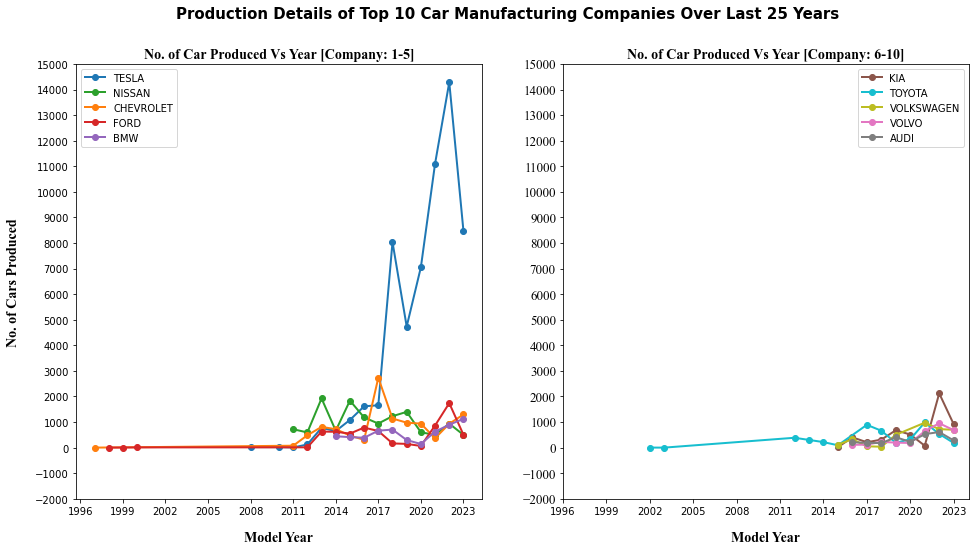

In [11]:
# Production Scenerio of the companies

TESLA_based_on_year = Each_company_production_details['TESLA'].groupby(by=['Model Year'])[['Make']].count()
NISSAN_based_on_year = Each_company_production_details['NISSAN'].groupby(by=['Model Year'])[['Make']].count()
CHEVROLET_based_on_year = Each_company_production_details['CHEVROLET'].groupby(by=['Model Year'])[['Make']].count()
FORD_based_on_year = Each_company_production_details['FORD'].groupby(by=['Model Year'])[['Make']].count()
BMW_based_on_year = Each_company_production_details['BMW'].groupby(by=['Model Year'])[['Make']].count()
KIA_based_on_year = Each_company_production_details['KIA'].groupby(by=['Model Year'])[['Make']].count()
TOYOTA_based_on_year = Each_company_production_details['TOYOTA'].groupby(by=['Model Year'])[['Make']].count()
VOLKSWAGEN_based_on_year = Each_company_production_details['VOLKSWAGEN'].groupby(by=['Model Year'])[['Make']].count()
VOLVO_based_on_year = Each_company_production_details['VOLVO'].groupby(by=['Model Year'])[['Make']].count()
AUDI_based_on_year = Each_company_production_details['AUDI'].groupby(by=['Model Year'])[['Make']].count() 

# Visualization

font = {'family': 'Times New Roman','color':'black','weight': 'bold','size': 14,}
font_tick = {"family":"Times New Roman","size":13,"weight":"normal","style":"normal"}

fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_figwidth(16)
fig.set_figheight(8)
fig.suptitle("Production Details of Top 10 Car Manufacturing Companies Over Last 25 Years",size=15,weight='bold')

ax1.plot(TESLA_based_on_year.index.values,TESLA_based_on_year['Make'],"tab:blue",label='TESLA',marker='o',linewidth=2)
ax1.plot(NISSAN_based_on_year.index.values,NISSAN_based_on_year['Make'],"tab:green",label="NISSAN",marker='o',linewidth=2)
ax1.plot(CHEVROLET_based_on_year.index.values,CHEVROLET_based_on_year['Make'],"tab:orange",label="CHEVROLET",marker='o',
         linewidth=2)
ax1.plot(FORD_based_on_year.index.values,FORD_based_on_year['Make'],"tab:red",label="FORD",marker='o',linewidth=2)
ax1.plot(BMW_based_on_year.index.values,BMW_based_on_year['Make'],"tab:purple",label="BMW",marker='o',linewidth=2)

ax2.plot(KIA_based_on_year.index.values,KIA_based_on_year['Make'],"tab:brown",label="KIA",marker='o',linewidth=2)
ax2.plot(TOYOTA_based_on_year.index.values,TOYOTA_based_on_year['Make'],"tab:cyan",label="TOYOTA",marker='o',linewidth=2)
ax2.plot(VOLKSWAGEN_based_on_year.index.values,VOLKSWAGEN_based_on_year['Make'],"tab:olive",label="VOLKSWAGEN",marker='o',
         linewidth=2)
ax2.plot(VOLVO_based_on_year.index.values,VOLVO_based_on_year['Make'],"tab:pink",label="VOLVO",marker='o',linewidth=2)
ax2.plot(AUDI_based_on_year.index.values,AUDI_based_on_year['Make'],"tab:gray",label="AUDI",marker='o',linewidth=2)

ax1.set_title("No. of Car Produced Vs Year [Company: 1-5]",fontdict=font)
ax1.set_ylabel("No. of Cars Produced",fontdict=font,labelpad=15)
ax1.set_xlabel("Model Year",fontdict=font,labelpad=15)
ax1.set_xticks(np.arange(1996,2024,3),fontproperties=font_tick)
ax1.set_yticks(np.arange(-2000,16000,1000),fontproperties=font_tick)
ax1.legend()

ax2.set_title("No. of Car Produced Vs Year [Company: 6-10]",fontdict=font)
ax2.set_xlabel("Model Year",fontdict=font,labelpad=15)
ax2.set_xticks(np.arange(1996,2024,3),fontproperties=font_tick)
ax2.set_yticks(np.arange(-2000,16000,1000),fontproperties=font_tick)
ax2.legend()

plt.yticks(np.arange(-2000,16000,1000),fontproperties=font_tick)
plt.show()


The graph illustrates that **TESLA** company starting its journey from 2008 had the most no. of cars manufactured over the last 15 years. In **2022** ,its manufacture skyrocketed to **14283**. 

In [12]:
# Production Details of TESLA company

Tesla_total_production = data[data['Make']=='TESLA']['Model'].count()
print("Total Production of TESLA(2008-2023): {}".format(Tesla_total_production))

TESLA_based_on_year.style.highlight_max(color='lightgreen')

Total Production of TESLA(2008-2023): 59629


,Make
Model Year,
2008,21
2010,21
2011,7
2012,124
2013,775
2014,648
2015,1083
2016,1616
2017,1656


## Authors:

[<b>Musarrat Bintay Hossain,](https://www.linkedin.com/in/musarrat-hossain-b97948176/)<br>
BSc. in Computer Science and Technology<br>
Changsha University of Science and Technology, China. 